**Topic: Classification Metrics**

Settings: Where applicable, use test_size=0.30, random_state=4444. This will permit comparison of results across users. Use congressional votes data.

In [44]:
#Import necessary stuff to start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.dates as dte
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pickle

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [4]:
#Bring back the dataframe from challenge 5.1
with open('vote_df.pkl', 'rb') as picklefile: 
   congress = pickle.load(picklefile)

In [5]:
congress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                                     435 non-null object
handicapped-infants                       435 non-null float64
water-project-cost-sharing                435 non-null float64
adoption-of-the-budget-resolution         435 non-null float64
physician-fee-freeze                      435 non-null float64
el-salvador-aid                           435 non-null float64
religious-groups-in-schools               435 non-null float64
anti-satellite-test-ban                   435 non-null float64
aid-to-nicaraguan-contras                 435 non-null float64
mx-missile                                435 non-null float64
immigration                               435 non-null float64
synfuels-corporation-cutback              435 non-null float64
education-spending                        435 non-null float64
superfund-right-to-sue                    435 non-null float64
crime         

In [7]:
y = congress.iloc[:, 0]
y = y.replace(to_replace='republican', value=1)
y = y.replace(to_replace='democrat', value=0)
X = congress.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

**Exercise 6.1**

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [14]:
#KNN
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
ypred_knn = knn.predict(X_test)

knn.predict_proba(X_test)

knn_acc = accuracy_score(y_test, ypred_knn)
print "Accuracy", knn_acc

knn_precision = precision_score(y_test, ypred_knn)
print "Precision", knn_precision # Portion of your predicted positives that are actually positive

knn_recall = recall_score(y_test, ypred_knn)
print "Recall", knn_recall # Actual positives your model caught

knn_f1 = f1_score(y_test, ypred_knn) 
print "F1", knn_f1 # Average of precision and recall

Accuracy 0.931297709924
Precision 0.941176470588
Recall 0.888888888889
F1 0.914285714286


In [15]:
#Logit
logit = LogisticRegression()
logit.fit(X_train, y_train)
ypred_logit = logit.predict(X_test)

logit_acc = accuracy_score(y_test, ypred_logit)
print "Accuracy", logit_acc

logit_precision = precision_score(y_test, ypred_logit)
print "Precision", logit_precision # Portion of your predicted positives that are actually positive

logit_recall = recall_score(y_test, ypred_logit)
print "Recall", logit_recall # Actual positives your model caught

logit_f1 = f1_score(y_test, ypred_logit) 
print "F1", logit_f1 # Average of precision and recall

Accuracy 0.93893129771
Precision 0.96
Recall 0.888888888889
F1 0.923076923077


In [16]:
#Gaussian Naive Bayes
nb = GaussianNB()
nbfit = nb.fit(X_train, y_train)
ypred_nb = nb.predict(X_test)

nb_acc = accuracy_score(y_test, ypred_nb)
print "Accuracy", nb_acc

nb_precision = precision_score(y_test, ypred_nb)
print "Precision", nb_precision # Portion of your predicted positives that are actually positive

nb_recall = recall_score(y_test, ypred_nb)
print "Recall", nb_recall # Actual positives your model caught

nb_f1 = f1_score(y_test, ypred_nb) 
print "F1", nb_f1 # Average of precision and recall

Accuracy 0.93893129771
Precision 0.979166666667
Recall 0.87037037037
F1 0.921568627451


In [40]:
#Support Vector Machine

svc = SVC(probability = True)
svcfit = svc.fit(X_train, y_train)
ypred_svc = svc.predict(X_test)

svc_acc = accuracy_score(y_test, ypred_svc)
print "Accuracy", svc_acc

svc_precision = precision_score(y_test, ypred_svc)
print "Precision", svc_precision # Portion of your predicted positives that are actually positive

svc_recall = recall_score(y_test, ypred_svc)
print "Recall", svc_recall # Actual positives your model caught

svc_f1 = f1_score(y_test, ypred_svc) 
print "F1", svc_f1 # Average of precision and recall

Accuracy 0.954198473282
Precision 0.961538461538
Recall 0.925925925926
F1 0.943396226415


In [18]:
#Decision Tree

dt = DecisionTreeClassifier()
dtfit = dt.fit(X_train, y_train)
ypred_dt = dt.predict(X_test)

dt_acc = accuracy_score(y_test, ypred_dt)
print "Accuracy", dt_acc

dt_precision = precision_score(y_test, ypred_dt)
print "Precision", dt_precision # Portion of your predicted positives that are actually positive

dt_recall = recall_score(y_test, ypred_dt)
print "Recall", dt_recall # Actual positives your model caught

dt_f1 = f1_score(y_test, ypred_dt) 
print "F1", dt_f1 # Average of precision and recall

Accuracy 0.93893129771
Precision 0.942307692308
Recall 0.907407407407
F1 0.924528301887


In [19]:
#Random Forest

rf = RandomForestClassifier()
rffit = rf.fit(X_train, y_train)
ypred_rf = rf.predict(X_test)

rf_acc = accuracy_score(y_test, ypred_rf)
print "Accuracy", rf_acc

rf_precision = precision_score(y_test, ypred_rf)
print "Precision", rf_precision # Portion of your predicted positives that are actually positive

rf_recall = recall_score(y_test, ypred_rf)
print "Recall", rf_recall # Actual positives your model caught

rf_f1 = f1_score(y_test, ypred_rf) 
print "F1", rf_f1 # Average of precision and recall

Accuracy 0.969465648855
Precision 0.980769230769
Recall 0.944444444444
F1 0.962264150943


**Exercise 6.2**

For each, draw the Precision-Recall curve, ROC curve and calculate the AUC.

AUC 0.948412698413


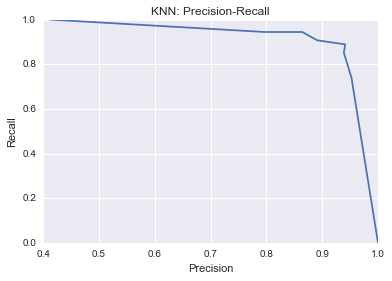

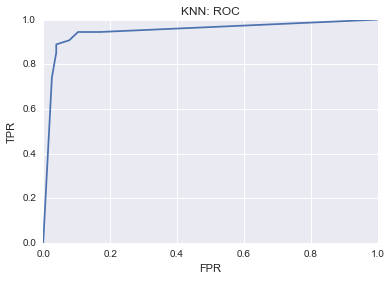

In [49]:
#KNN
knn_proba = knn.predict_proba(X_test) #Predicts probability of 0 (Democrat), then 1 (Republican)
precision1, recall1, thresholds1 = precision_recall_curve(y_test, knn_proba[:, 1])

#Plot precision-recall curve
plt.plot(precision1, recall1)
plt.title("KNN: Precision-Recall")
plt.xlabel("Precision")
plt.ylabel("Recall");

fpr1, tpr1, thresholds1 = roc_curve(y_test, knn_proba[:, 1])

# Plot the ROC curve!
plt.figure()
plt.plot(fpr1, tpr1)
plt.title("KNN: ROC")
plt.xlabel('FPR')
plt.ylabel('TPR');

#Calculate AUC
knn_auc = auc(fpr1, tpr1)
print "AUC", knn_auc

AUC 0.987734487734


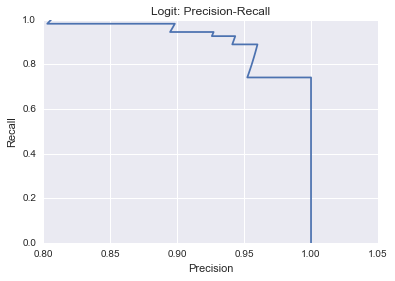

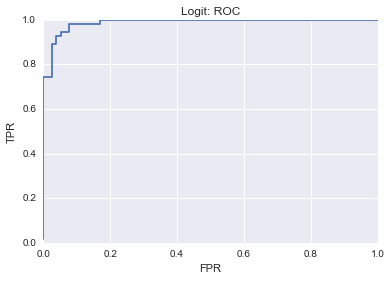

In [50]:
#Logit
logit_proba = logit.predict_proba(X_test) #Predicts probability of 0 (Democrat), then 1 (Republican)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, logit_proba[:, 1])

#Plot precision-recall curve
plt.plot(precision2, recall2)
plt.title("Logit: Precision-Recall")
plt.xlabel("Precision")
plt.ylabel("Recall");

fpr2, tpr2, thresholds2 = roc_curve(y_test, logit_proba[:, 1])

# Plot the ROC curve!
plt.figure()
plt.plot(fpr2, tpr2)
plt.title("Logit: ROC")
plt.xlabel('FPR')
plt.ylabel('TPR');

#Calculate AUC
logit_auc = auc(fpr2, tpr2)
print "AUC", logit_auc

AUC 0.984126984127


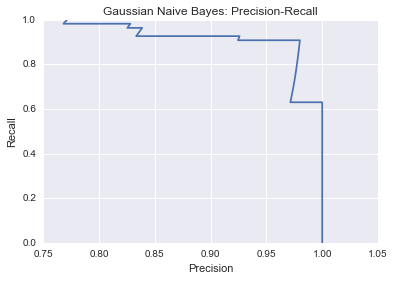

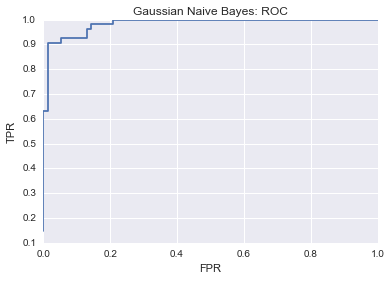

In [51]:
#Gaussian Naive Bayes
nb_proba = nb.predict_proba(X_test) #Predicts probability of 0 (Democrat), then 1 (Republican)
precision3, recall3, thresholds3 = precision_recall_curve(y_test, nb_proba[:, 1])

#Plot precision-recall curve
plt.plot(precision3, recall3)
plt.title("Gaussian Naive Bayes: Precision-Recall")
plt.xlabel("Precision")
plt.ylabel("Recall");

fpr3, tpr3, thresholds3 = roc_curve(y_test, nb_proba[:, 1])

# Plot the ROC curve!
plt.figure()
plt.plot(fpr3, tpr3)
plt.title("Gaussian Naive Bayes: ROC")
plt.xlabel('FPR')
plt.ylabel('TPR');

#Calculate AUC
nb_auc = auc(fpr3, tpr3)
print "AUC", nb_auc

AUC 0.994949494949


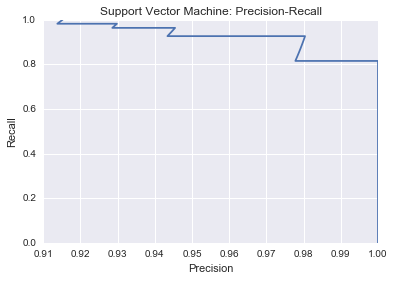

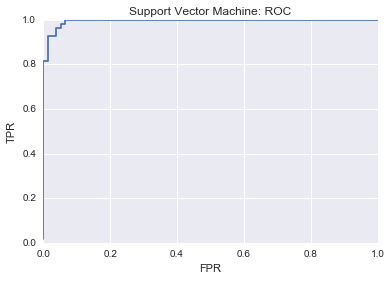

In [52]:
#Support Vector Machine
svc_proba = svc.predict_proba(X_test) #Predicts probability of 0 (Democrat), then 1 (Republican)
precision4, recall4, thresholds4 = precision_recall_curve(y_test, svc_proba[:, 1])

#Plot precision-recall curve
plt.plot(precision4, recall4)
plt.title("Support Vector Machine: Precision-Recall")
plt.xlabel("Precision")
plt.ylabel("Recall");


fpr4, tpr4, thresholds4 = roc_curve(y_test, svc_proba[:, 1])

# Plot the ROC curve!
plt.figure()
plt.plot(fpr4, tpr4)
plt.title("Support Vector Machine: ROC")
plt.xlabel('FPR')
plt.ylabel('TPR');

#Calculate AUC
svc_auc = auc(fpr4, tpr4)
print "AUC", svc_auc

AUC 0.934223184223


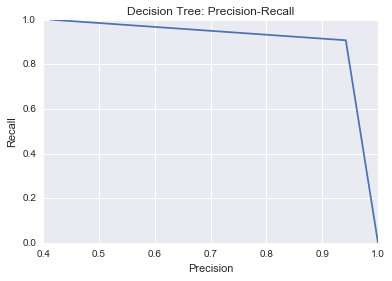

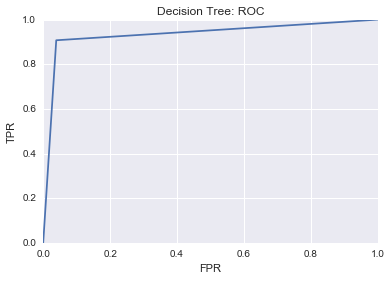

In [54]:
#Decision Tree
dt_proba = dt.predict_proba(X_test) #Predicts probability of 0 (Democrat), then 1 (Republican)
precision5, recall5, thresholds5 = precision_recall_curve(y_test, dt_proba[:, 1])

#Plot precision-recall curve
plt.plot(precision5, recall5)
plt.title("Decision Tree: Precision-Recall")
plt.xlabel("Precision")
plt.ylabel("Recall");

fpr5, tpr5, thresholds5 = roc_curve(y_test, dt_proba[:, 1])

# Plot the ROC curve!
plt.figure()
plt.plot(fpr5, tpr5)
plt.title("Decision Tree: ROC")
plt.xlabel('FPR')
plt.ylabel('TPR');

#Calculate AUC
dt_auc = auc(fpr5, tpr5)
print "AUC", dt_auc

AUC 0.986171236171


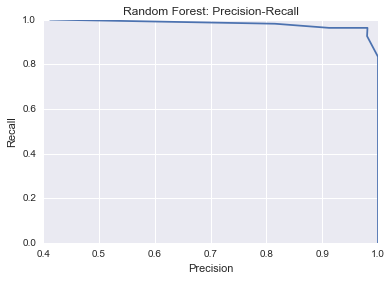

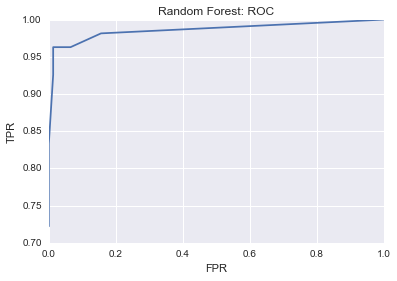

In [55]:
#Random Forest
rf_proba = rf.predict_proba(X_test) #Predicts probability of 0 (Democrat), then 1 (Republican)
precision6, recall6, thresholds6 = precision_recall_curve(y_test, rf_proba[:, 1])

#Plot precision-recall curve
plt.plot(precision6, recall6)
plt.title("Random Forest: Precision-Recall")
plt.xlabel("Precision")
plt.ylabel("Recall");

fpr6, tpr6, thresholds6 = roc_curve(y_test, rf_proba[:, 1])

# Plot the ROC curve!
plt.figure()
plt.plot(fpr6, tpr6)
plt.title("Random Forest: ROC")
plt.xlabel('FPR')
plt.ylabel('TPR');

#Calculate AUC
dt_auc = auc(fpr6, tpr6)
print "AUC", dt_auc

**Exercise 6.3**

Draw the Precision-Recall curve, ROC curve (and calculate AUC) for the logistic regression classifier from Exercise 5.12 in 05-Classification Challenge that uses Haberman Survival Dataset.

In [56]:
haberman = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', delimiter = ",", names = ['patient-age', 'operation-year', 'nodes-detected', 'survival-status'])

In [62]:
#Use logistic regression to predict survival after 5 years
X_hab = haberman.iloc[:, 0:3]
y_hab = haberman.iloc[:, 3]
y_hab = y_hab - 1

Xhab_train, Xhab_test, yhab_train, yhab_test = train_test_split(X_hab, y_hab, test_size=0.3, random_state=4444)

logit_hab = LogisticRegression()
logit_hab.fit(Xhab_train, yhab_train)
ypred_hab = logit_hab.predict(Xhab_test)

logit_hab_acc = accuracy_score(yhab_test, ypred_hab)
print logit_hab_acc

0.815217391304


AUC 0.647522522523


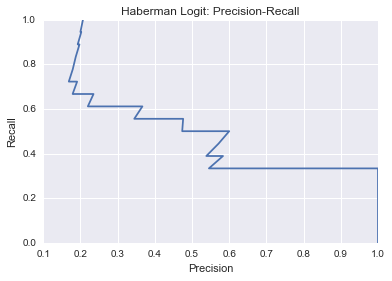

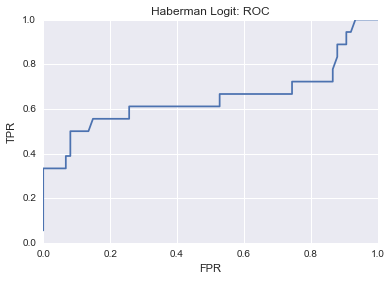

In [63]:
#Logit probabilities for Haberman data
hab_proba = logit_hab.predict_proba(Xhab_test) #Predicts probability of 0 (Democrat), then 1 (Republican)
precision7, recall7, thresholds7 = precision_recall_curve(yhab_test, hab_proba[:, 1])

#Plot precision-recall curve
plt.plot(precision7, recall7)
plt.title("Haberman Logit: Precision-Recall")
plt.xlabel("Precision")
plt.ylabel("Recall");

fpr7, tpr7, thresholds7 = roc_curve(yhab_test, hab_proba[:, 1])

# Plot the ROC curve!
plt.figure()
plt.plot(fpr7, tpr7)
plt.title("Haberman Logit: ROC")
plt.xlabel('FPR')
plt.ylabel('TPR');

#Calculate AUC
hab_auc = auc(fpr7, tpr7)
print "AUC", hab_auc